In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*') 
from rdkit import Chem

Data borrowed from

Schneider, Nadine, Nikolaus Stiefl, and Gregory A. Landrum. 

**"What’s what: The (nearly) definitive guide to reaction role assignment."**

Journal of chemical information and modeling 56.12 (2016): 2336-2346

In [98]:
df = pd.read_csv('data/uspto50k.csv')
df.head()

,rxn_Class,patentID,rxnSmiles_Mapping_NameRxn,reactantSet_NameRxn,NameRxn_Mapping_Complete,rxnSmiles_Mapping_IndigoTK,reactantSet_IndigoTK,IndigoTK_Mapping_Complete,rxnSmiles_IndigoAutoMapperKNIME,reactantSet_IndigoAutoMapperKNIME,IndigoAutoMapperKNIME_Mapping_Complete
0,6,US05849732,C.CCCCCC.CO.O=C(OCc1ccccc1)[NH:1][CH2:2][CH2:3...,"set([3, 4])",True,C(OC([NH:11][CH2:12][CH2:13][CH2:14][CH2:15][C...,"set([0, 2])",True,C.CCCCCC.CO.[CH3:10][O:11][C:12]([C@@H:14]([NH...,"set([3, 4])",True
1,2,US20120114765A1,O[C:1](=[O:2])[c:3]1[cH:4][c:5]([N+:6](=[O:7])...,"set([0, 1])",True,[Cl:1][c:2]1[cH:3][n:4][cH:5][c:6]([Cl:20])[c:...,"set([0, 1])",True,[NH2:1][c:2]1[c:11]2[c:6]([cH:7][n:8][cH:9][cH...,"set([0, 1])",True
2,1,US08003648B2,Cl.O=[CH:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[n:7...,"set([1, 3])",True,[CH2:1]([NH:3][CH2:4][CH3:5])[CH3:2].C([BH3-])...,"set([0, 3])",True,[CH3:1][CH2:2][NH:3][CH2:4][CH3:5].[CH3:6][c:7...,"set([0, 1])",True
3,1,US09045475B2,CC(=O)O[BH-](OC(C)=O)OC(C)=O.ClCCl.O=[C:1]([CH...,"set([2, 3])",True,[nH:1]1[c:5]2[n:6][cH:7][c:8]([O:10][c:11]3[cH...,"set([0, 3])",True,CC(O[BH-](OC(=O)C)OC(=O)C)=O.[CH3:14][C:15]1([...,"set([1, 3])",True
4,2,US08188098B2,CCN(C(C)C)C(C)C.ClCCl.Cl[C:1](=[O:2])[O:3][CH:...,"set([2, 5])",True,Cl[C:2]([O:4][CH:5]1[CH2:9][CH2:8][CH2:7][CH2:...,"set([0, 2])",True,CCN(C(C)C)C(C)C.[CH3:10][CH2:11][O:12][c:13]1[...,"set([1, 4])",True


Number of reactions: 50000
Reaction class distribution:
1     15140
2     11889
6      8232
3      5654
7      4610
9      1842
4       909
8       821
5       672
10      231
Name: rxn_Class, dtype: int64


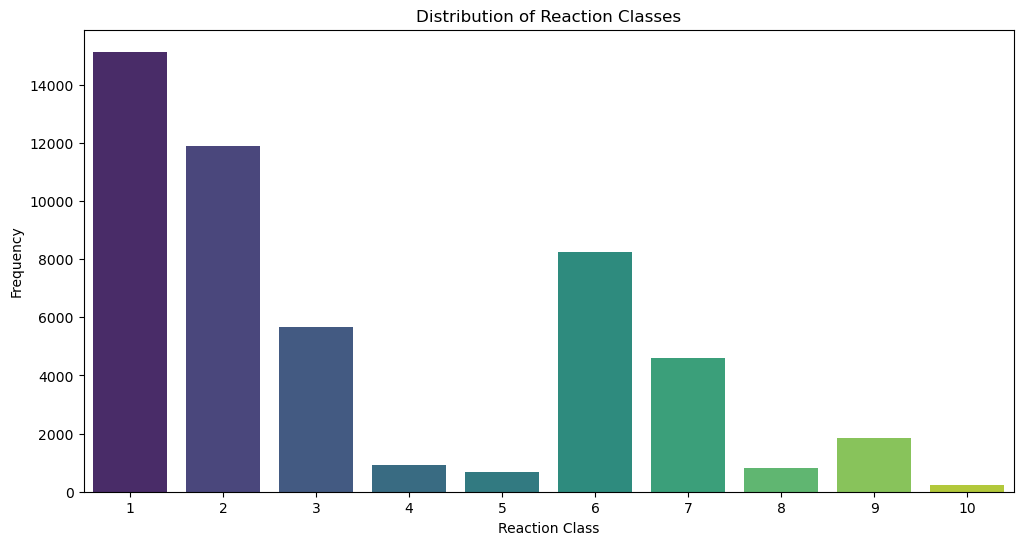

In [99]:
print(f'Number of reactions: {len(df)}')
reaction_class_distribution = df["rxn_Class"].value_counts()
print(f'Reaction class distribution:\n{reaction_class_distribution}')

plt.figure(figsize=(12, 6))
sns.barplot(x=reaction_class_distribution.index, y=reaction_class_distribution.values, palette='viridis')
plt.xlabel('Reaction Class')
plt.ylabel('Frequency')
plt.title('Distribution of Reaction Classes')
#plt.xticks(rotation=45)
plt.show()

In [33]:
print(f'Mapping completion (NameRxn): {df["NameRxn_Mapping_Complete"].value_counts()}')
print(f'Mapping completion (IndigoTK): {df["IndigoTK_Mapping_Complete"].value_counts()}')
print(f'Mapping completion (IndigoAutoMapperKNIME): {df["IndigoAutoMapperKNIME_Mapping_Complete"].value_counts()}')


Mapping completion (NameRxn): True    50000
Name: NameRxn_Mapping_Complete, dtype: int64
Mapping completion (IndigoTK): True    50000
Name: IndigoTK_Mapping_Complete, dtype: int64
Mapping completion (IndigoAutoMapperKNIME): True     48265
False     1735
Name: IndigoAutoMapperKNIME_Mapping_Complete, dtype: int64


In [101]:
print(df.isnull().sum())


rxn_Class                                 0
patentID                                  0
rxnSmiles_Mapping_NameRxn                 0
reactantSet_NameRxn                       0
NameRxn_Mapping_Complete                  0
rxnSmiles_Mapping_IndigoTK                0
reactantSet_IndigoTK                      0
IndigoTK_Mapping_Complete                 0
rxnSmiles_IndigoAutoMapperKNIME           0
reactantSet_IndigoAutoMapperKNIME         0
IndigoAutoMapperKNIME_Mapping_Complete    0
dtype: int64


In [153]:
from rdkit import Chem

def get_reaction_components(reaction_smiles):
    return reaction_smiles.split('>>')

def num_molecules(smiles):
    return len(smiles.split('.'))

def num_atoms(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol.GetNumAtoms() if mol else 0

def unique_atoms(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if not mol:
        return set()
    return list(set(atom.GetSymbol() for atom in mol.GetAtoms()))

def unique_atoms_num(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if not mol:
        return set()
    return list(set(atom.GetAtomicNum() for atom in mol.GetAtoms()))

def num_bonds(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol.GetNumBonds() if mol else 0


def bond_types(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if not mol:
        return []
    bond_types = [bond.GetBondType() for bond in mol.GetBonds()]
    return bond_types

def num_of_heavy_molecules(smiles):
    smils_list = smiles.split('.')
    heavy_smiles = []
    for s in smils_list:
        mol = Chem.MolFromSmiles(s)
        if mol is None:
            return False  # Invalid SMILES
        num_atoms = mol.GetNumAtoms()
        if num_atoms > 1:  # More than one atom, hence not a single atom or ion
            h_s = Chem.MolToSmiles(mol)
            heavy_smiles.append(h_s)
    return len(heavy_smiles)


In [154]:

df[['reactants', 'products']] = df['rxnSmiles_Mapping_NameRxn'].apply(lambda x: pd.Series(get_reaction_components(x)))

df['num_molecules_reactants'] = df['reactants'].apply(num_molecules)
df['num_molecules_products'] = df['products'].apply(num_molecules)

df['num_atoms_reactants'] = df['reactants'].apply(num_atoms)
df['num_atoms_products'] = df['products'].apply(num_atoms)

df['unique_atoms_reactants'] = df['reactants'].apply(unique_atoms)
df['unique_atoms_products'] = df['products'].apply(unique_atoms)

df['unique_atoms_reactants_num'] = df['reactants'].apply(unique_atoms_num)
df['unique_atoms_products_num'] = df['products'].apply(unique_atoms_num)

df['num_bonds_reactants'] = df['reactants'].apply(num_bonds)
df['num_bonds_products'] = df['products'].apply(num_bonds)

df['bond_types_reactants'] = df['reactants'].apply(bond_types)
df['bond_types_products'] = df['products'].apply(bond_types)

df['heavy_reactants'] = df['reactants'].apply(num_of_heavy_molecules)



In [147]:
df['unique_atoms_reactants_num'] = df['reactants'].apply(unique_atoms_num)
df['unique_atoms_products_num'] = df['products'].apply(unique_atoms_num)

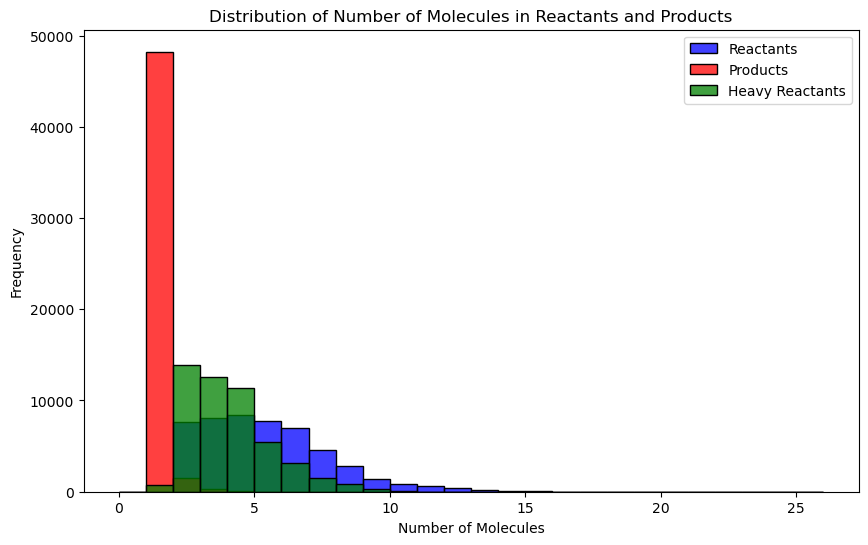

Average number of molecules in reactants: 4.9503
Average number of molecules in products: 1.04172
Minimum number of molecules in reactants: 2 and maximum number of molecules in reactants: 25
Minimum number of molecules in products: 1 and maximum number of molecules in products: 5
Minimum number of heavy molecules in reactants: 1 and maximum number of heavy molecules in reactants and products: 15


In [114]:
plt.figure(figsize=(10, 6))
sns.histplot(df['num_molecules_reactants'], bins=range(0, df['num_molecules_reactants'].max() + 2),color='blue', label='Reactants', kde=False, alpha=0.75)
sns.histplot(df['num_molecules_products'], bins=range(0, df['num_molecules_reactants'].max() + 2), color='red', label='Products', kde=False, alpha=0.75)
sns.histplot(df['heavy_reactants'], bins=range(0, df['num_molecules_reactants'].max() + 2), color='green', label='Heavy Reactants', kde=False, alpha=0.75)

plt.xlabel('Number of Molecules')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Molecules in Reactants and Products')
plt.legend()
plt.show()

print(f'Average number of molecules in reactants: {df["num_molecules_reactants"].mean()}')
print(f'Average number of molecules in products: {df["num_molecules_products"].mean()}')
print(f'Minimum number of molecules in reactants: {df["num_molecules_reactants"].min()} and maximum number of molecules in reactants: {df["num_molecules_reactants"].max()}')
print(f'Minimum number of molecules in products: {df["num_molecules_products"].min()} and maximum number of molecules in products: {df["num_molecules_products"].max()}')
print(f'Minimum number of heavy molecules in reactants: {df["heavy_reactants"].min()} and maximum number of heavy molecules in reactants and products: {df["heavy_reactants"].max()}')

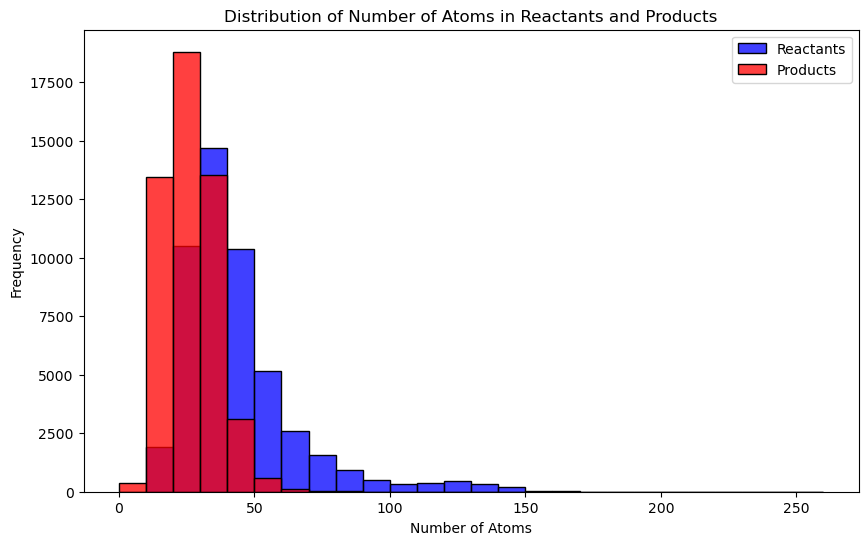

Average number of atoms in reactants: 43.35122
Average number of atoms in products: 26.06688
Minimum number of atoms in reactants: 9 and maximum number of atoms in reactants: 268
Minimum number of atoms in products: 9 and maximum number of atoms in products: 97
Mode of number of atoms in reactants: 33 and mode of number of atoms in products: 29
Median of number of atoms in reactants: 38.0 and median of number of atoms in products: 26.0


In [118]:
plt.figure(figsize=(10, 6))
sns.histplot(df['num_atoms_reactants'],bins=range(0, df['num_atoms_reactants'].max() + 2, 10), color='blue', label='Reactants')
sns.histplot(df['num_atoms_products'],bins=range(0, df['num_atoms_reactants'].max() + 2, 10), color='red', label='Products')
plt.xlabel('Number of Atoms')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Atoms in Reactants and Products')
plt.legend()
plt.show()

print(f'Average number of atoms in reactants: {df["num_atoms_reactants"].mean()}')
print(f'Average number of atoms in products: {df["num_atoms_products"].mean()}')
print(f'Minimum number of atoms in reactants: {df["num_atoms_reactants"].min()} and maximum number of atoms in reactants: {df["num_atoms_reactants"].max()}')
print(f'Minimum number of atoms in products: {df["num_atoms_products"].min()} and maximum number of atoms in products: {df["num_atoms_products"].max()}')
print(f'Mode of number of atoms in reactants: {df["num_atoms_reactants"].mode()[0]} and mode of number of atoms in products: {df["num_atoms_products"].mode()[0]}')
print(f'Median of number of atoms in reactants: {df["num_atoms_reactants"].median()} and median of number of atoms in products: {df["num_atoms_products"].median()}')


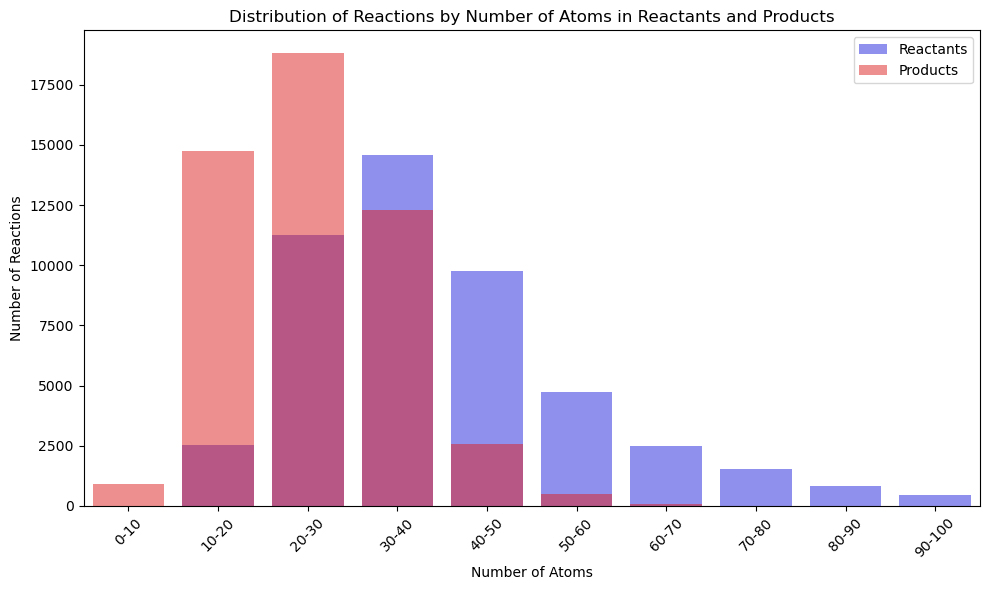

In [119]:

def bin_atoms_counts(data, column_name, bin_width):
    bins = range(0, max(data[column_name]) + bin_width, bin_width)
    labels = [f'{i}-{i + bin_width}' for i in bins[:-1]]
    data['bin'] = pd.cut(data[column_name], bins=bins, labels=labels, include_lowest=True)
    return data.groupby('bin').size()

bin_width = 10
counts_reactants = bin_atoms_counts(df, 'num_atoms_reactants', bin_width)
counts_products = bin_atoms_counts(df, 'num_atoms_products', bin_width)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts_reactants.index, y=counts_reactants.values, color='blue', alpha=0.5, label='Reactants')
sns.barplot(x=counts_products.index, y=counts_products.values, color='red', alpha=0.5, label='Products')
plt.xlabel('Number of Atoms')
plt.ylabel('Number of Reactions')
plt.title('Distribution of Reactions by Number of Atoms in Reactants and Products')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

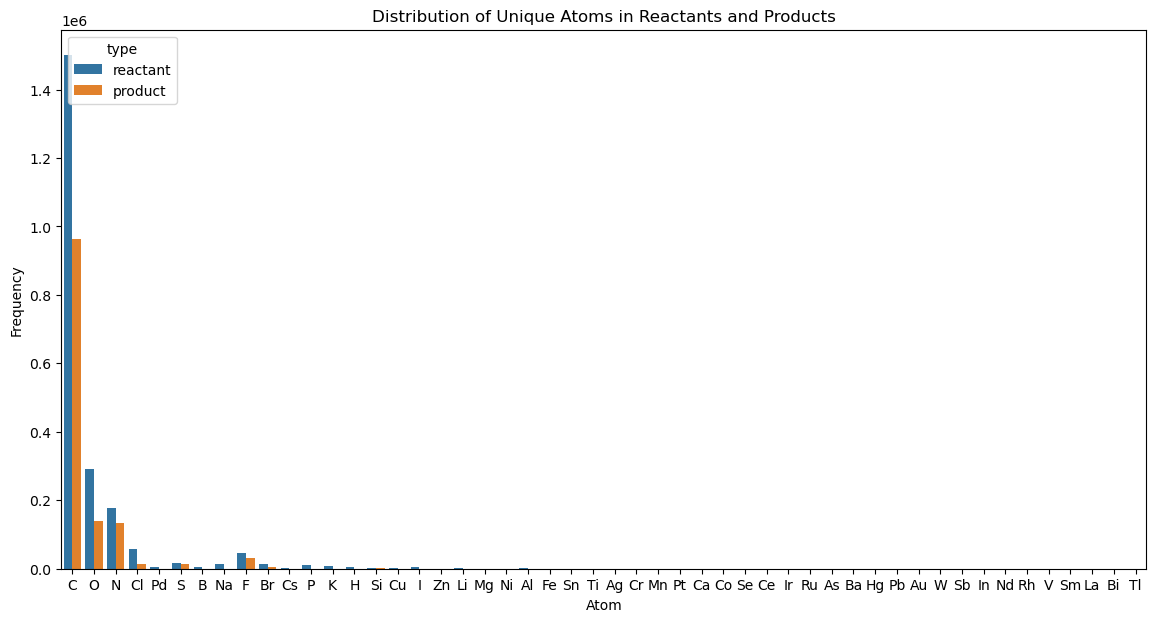

In [167]:

from collections import Counter

def extract_atoms(smiles):
    atom_list = []
    smils_list = smiles.split('.')
    for s in smils_list:
        mol = Chem.MolFromSmiles(s)
        if mol:
            for atom in mol.GetAtoms():
                atom_list.append(atom.GetSymbol())
    return atom_list

df['atoms_reactants'] = df['reactants'].apply(extract_atoms)
df['atoms_products'] = df['products'].apply(extract_atoms)

reactant_atoms_counter = Counter([atom for sublist in df['atoms_reactants'] for atom in sublist])
product_atoms_counter = Counter([atom for sublist in df['atoms_products'] for atom in sublist])

reactant_atoms_df = pd.DataFrame.from_dict(reactant_atoms_counter, orient='index', columns=['frequency']).reset_index()
reactant_atoms_df.columns = ['atom', 'frequency']
reactant_atoms_df['type'] = 'reactant'

product_atoms_df = pd.DataFrame.from_dict(product_atoms_counter, orient='index', columns=['frequency']).reset_index()
product_atoms_df.columns = ['atom', 'frequency']
product_atoms_df['type'] = 'product'

atoms_df = pd.concat([reactant_atoms_df, product_atoms_df])

plt.figure(figsize=(14, 7))
sns.barplot(data=atoms_df, x='atom', y='frequency', hue='type')
plt.xlabel('Atom')
plt.ylabel('Frequency')
plt.title('Distribution of Unique Atoms in Reactants and Products')
plt.show()


In [168]:
unique_atoms_reactants = set().union(*df['unique_atoms_reactants'])
unique_atoms_products = set().union(*df['unique_atoms_products'])

unique_atoms_in_dataset = unique_atoms_reactants.union(unique_atoms_products)

print(f'Unique atoms in reactants: {unique_atoms_reactants}')
print(f'Unique atoms in products: {unique_atoms_products}')
print(f'Unique atoms in dataset: {unique_atoms_in_dataset}')


Unique atoms in reactants: {'Hg', 'Se', 'Tl', 'H', 'Mn', 'S', 'Bi', 'In', 'F', 'Li', 'P', 'Nd', 'Al', 'Ti', 'Cs', 'Ni', 'Ru', 'Ca', 'As', 'Na', 'Ir', 'C', 'Pt', 'Sm', 'Br', 'Au', 'Sn', 'Co', 'O', 'Sb', 'Pd', 'Cr', 'I', 'Cl', 'Zn', 'Ba', 'La', 'Ag', 'N', 'Cu', 'Fe', 'Pb', 'V', 'Rh', 'Si', 'Mg', 'B', 'W', 'K', 'Ce'}
Unique atoms in products: {'Se', 'Sn', 'Si', 'Ru', 'O', 'S', 'Cl', 'I', 'Na', 'K', 'C', 'B', 'La', 'F', 'Br', 'P', 'N', 'Li'}
Unique atoms in dataset: {'Hg', 'Se', 'Tl', 'H', 'Mn', 'S', 'Bi', 'In', 'F', 'Li', 'P', 'Nd', 'Al', 'Ti', 'Cs', 'Ni', 'Ru', 'Ca', 'As', 'Na', 'Ir', 'C', 'Pt', 'Sm', 'Br', 'Au', 'Sn', 'Co', 'O', 'Sb', 'Pd', 'Cr', 'I', 'Cl', 'Zn', 'Ba', 'La', 'Ag', 'N', 'Cu', 'Fe', 'Pb', 'V', 'Rh', 'Si', 'Mg', 'B', 'W', 'K', 'Ce'}


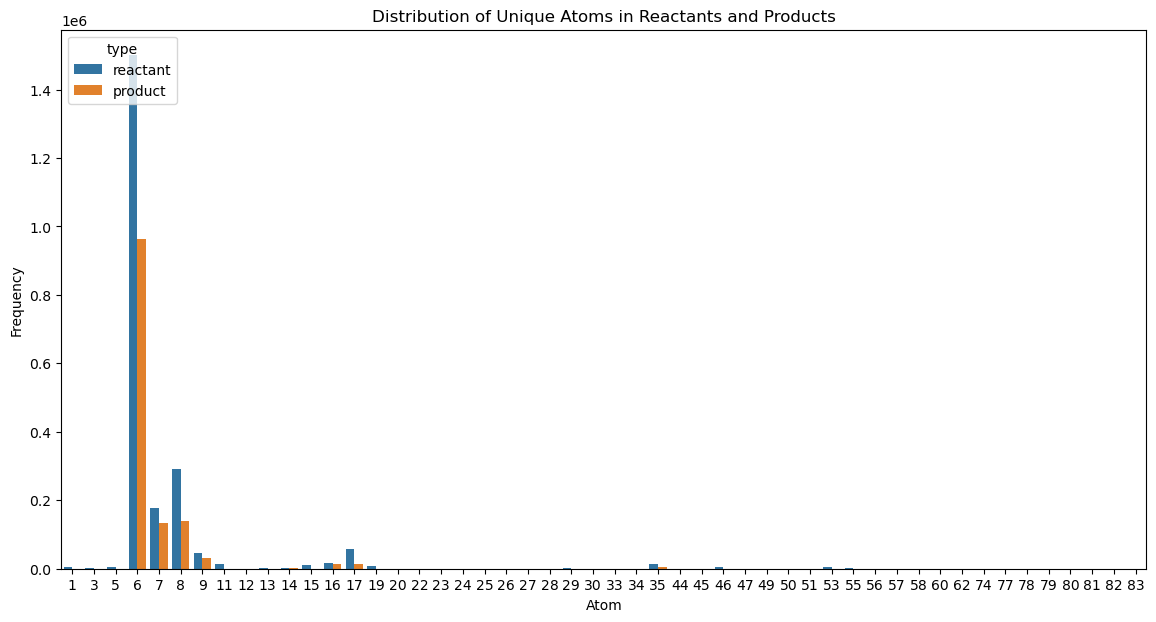

In [169]:

from collections import Counter

def extract_atoms(smiles):
    atom_list = []
    smils_list = smiles.split('.')
    for s in smils_list:
        mol = Chem.MolFromSmiles(s)
        if mol:
            for atom in mol.GetAtoms():
                atom_list.append(atom.GetAtomicNum())
    return atom_list

df['atoms_reactants'] = df['reactants'].apply(extract_atoms)
df['atoms_products'] = df['products'].apply(extract_atoms)

reactant_atoms_counter = Counter([atom for sublist in df['atoms_reactants'] for atom in sublist])
product_atoms_counter = Counter([atom for sublist in df['atoms_products'] for atom in sublist])

reactant_atoms_df = pd.DataFrame.from_dict(reactant_atoms_counter, orient='index', columns=['frequency']).reset_index()
reactant_atoms_df.columns = ['atom', 'frequency']
reactant_atoms_df['type'] = 'reactant'

product_atoms_df = pd.DataFrame.from_dict(product_atoms_counter, orient='index', columns=['frequency']).reset_index()
product_atoms_df.columns = ['atom', 'frequency']
product_atoms_df['type'] = 'product'

atoms_df = pd.concat([reactant_atoms_df, product_atoms_df])

plt.figure(figsize=(14, 7))
sns.barplot(data=atoms_df, x='atom', y='frequency', hue='type')
plt.xlabel('Atom')
plt.ylabel('Frequency')
plt.title('Distribution of Unique Atoms in Reactants and Products')
plt.show()


In [170]:
unique_atoms_reactants = set().union(*df['unique_atoms_reactants_num'])
unique_atoms_products = set().union(*df['unique_atoms_products_num'])

# Combine the unique atoms from reactants and products
unique_atoms_in_dataset = unique_atoms_reactants.union(unique_atoms_products)

# Print unique atoms
print(f'Unique atoms in reactants: {unique_atoms_reactants}')
print(f'Unique atoms in products: {unique_atoms_products}')
print(f'Unique atoms in dataset: {unique_atoms_in_dataset}')


Unique atoms in reactants: {1, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 44, 45, 46, 47, 49, 50, 51, 53, 55, 56, 57, 58, 60, 62, 74, 77, 78, 79, 80, 81, 82, 83}
Unique atoms in products: {34, 35, 3, 5, 6, 7, 8, 9, 11, 44, 14, 15, 16, 17, 50, 19, 53, 57}
Unique atoms in dataset: {1, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 44, 45, 46, 47, 49, 50, 51, 53, 55, 56, 57, 58, 60, 62, 74, 77, 78, 79, 80, 81, 82, 83}


In [173]:
avg_atoms_reactants = df['num_atoms_reactants'].mean()
avg_atoms_products = df['num_atoms_products'].mean()

avg_molecules_reactants = df['num_molecules_reactants'].mean()
avg_molecules_products = df['num_molecules_products'].mean()

avg_bonds_reactants = df['num_bonds_reactants'].mean()
avg_bonds_products = df['num_bonds_products'].mean()

print(f'Average number of atoms in reactants: {avg_atoms_reactants}')
print(f'Average number of atoms in products: {avg_atoms_products}')
print(f'Average number of molecules in reactants: {avg_molecules_reactants}')
print(f'Average number of molecules in products: {avg_molecules_products}')
print(f'Average number of bonds in reactants: {avg_bonds_reactants}')
print(f'Average number of bonds in products: {avg_bonds_products}')


Average number of atoms in reactants: 43.35122
Average number of atoms in products: 26.06688
Average number of molecules in reactants: 4.9503
Average number of molecules in products: 1.04172
Average number of bonds in reactants: 42.56578
Average number of bonds in products: 28.05938


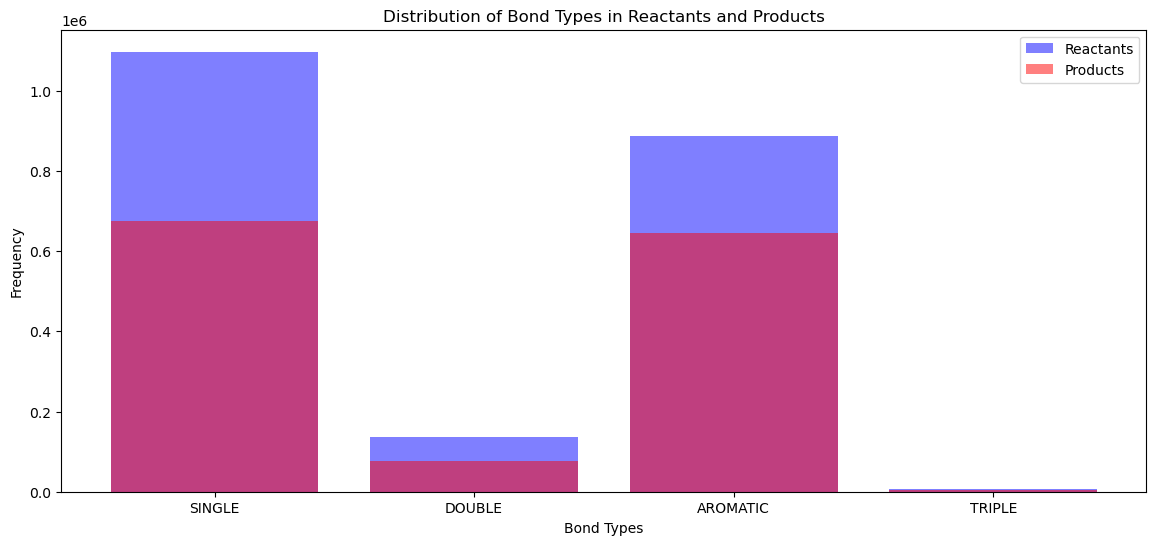

In [174]:
from collections import Counter

def count_bond_types(bond_types):
    counter = Counter(bond_types)
    bond_type_dict = {str(k): v for k, v in counter.items()}
    return bond_type_dict

bond_types_reactants = df['bond_types_reactants'].apply(count_bond_types)
bond_types_products = df['bond_types_products'].apply(count_bond_types)

all_bond_types_reactants = Counter()
for bond_dict in bond_types_reactants:
    all_bond_types_reactants.update(bond_dict)

all_bond_types_products = Counter()
for bond_dict in bond_types_products:
    all_bond_types_products.update(bond_dict)

plt.figure(figsize=(14, 6))
plt.bar(all_bond_types_reactants.keys(), all_bond_types_reactants.values(), color='blue', alpha=0.5, label='Reactants')
plt.bar(all_bond_types_products.keys(), all_bond_types_products.values(), color='red', alpha=0.5, label='Products')
plt.xlabel('Bond Types')
plt.ylabel('Frequency')
plt.title('Distribution of Bond Types in Reactants and Products')
plt.legend()
plt.show()
